In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('data.csv')
print(data.head)

<bound method NDFrame.head of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0  

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
data.drop(['Unnamed: 32', 'id'], axis = 1, inplace = True)
data['daignosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [ ]:
y = data['daignosis'].values
x_data = data.drop(['diagnosis'], axis = 1)

In [ ]:
x = (x_data - x_data.min()) / (x_data.max() - x_data.min()) # normalizing the input data
# print(x)

In [ ]:
from re import X
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 42)

x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (31, 483)
x test:  (31, 86)
y train:  (483,)
y test:  (86,)


In [ ]:
def initialize_weights_and_bias(dimension):
  w = np.random.randn(dimension, 1)*0.01
  b = 0.0
  return w, b

In [ ]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

In [ ]:
def forward_backward_propagation(w, b, x_train, y_train):
  m = x_train.shape[1]
  z = np.dot(w.T, x_train) + b
  y_head = sigmoid(z)

  # Add epsilon to prevent log(0) or log(1)
  epsilon = 1e-8
  cost = -(1/m)* np.sum(y_train * np.log(y_head + epsilon) + (1-y_train) * np.log(1-y_head + epsilon))

  derivative_weight = (1/m) * np.dot(x_train, (y_head - y_train).T)
  derivative_bias = (1/m) * np.sum(y_head - y_train)

  gradients = {"derivative_weight" : derivative_weight, "derivative_bias": derivative_bias}
  return cost, gradients

In [ ]:
def update(w, b, x_train, y_train, learning_rate, num_iterations):
  costs = []
  train_accuracies = []
  gradients = []

  for i in range(num_iterations):
    cost, grad = forward_backward_propagation(w, b, x_train, y_train)
    w -= learning_rate* grad["derivative_weight"]
    b -= learning_rate * grad["derivative_bias"]

    if i % 100 == 0:
      costs.append(cost)
      y_prediction_train = predict(w, b, x_train)
      train_accuracy = 100 - np.mean(np.abs(y_prediction_train - y_train))*100
      train_accuracies.append(train_accuracy)
      print(f"cost after iteration {i}: {cost}")
      print(f"Train accuracy after iteration {i}: {train_accuracy}%")

  parameters = {"weight": w, "bias": b}
  return parameters, gradients, costs, train_accuracies

In [ ]:
def predict(w, b, x_test):
  m = x_test.shape[1]
  y_prediction = np.zeros((1, m))
  z = sigmoid(np.dot(w.T, x_test) + b)

  for i in range(z.shape[1]):
    y_prediction[0, i] = 1 if z[0, i] > 0.5 else 0

  return y_prediction

In [ ]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate = 0.01, num_iterations = 1000):
  dimension = x_train.shape[0]
  w, b = initialize_weights_and_bias(dimension)

  parameters, gradients, costs, train_accuracies = update(w, b, x_train, y_train, learning_rate, num_iterations)

  y_prediction_test = predict(parameters["weight"], parameters["bias"], x_test)
  y_prediction_train = predict(parameters["weight"], parameters["bias"], x_train)

  print(f"Train accuracy: {100 - np.mean(np.abs(y_prediction_train - y_train))*100}%")
  print(f"Test accuracy: {100 - np.mean(np.abs(y_prediction_test - y_test))*100}%")

  return costs, train_accuracies

costs, train_accuracies = logistic_regression(x_train, y_train, x_test, y_test, learning_rate = 0.01, num_iterations = 10000)

/tmp/ipython-input-16-3980557118.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


cost after iteration 0: 1.0815279738251369
Train accuracy after iteration 0: 62.732919254658384%
cost after iteration 100: 5.377900679743802
Train accuracy after iteration 100: 37.267080745341616%
cost after iteration 200: 1.7792479484867632
Train accuracy after iteration 200: 84.26501035196688%
cost after iteration 300: 1.9803453869235286
Train accuracy after iteration 300: 81.15942028985506%
cost after iteration 400: 1.593569090378368
Train accuracy after iteration 400: 89.02691511387164%
cost after iteration 500: 1.6012567241528055
Train accuracy after iteration 500: 89.44099378881988%
cost after iteration 600: 1.501136956547471
Train accuracy after iteration 600: 88.81987577639751%
cost after iteration 700: 1.5570536035923401
Train accuracy after iteration 700: 87.99171842650104%
cost after iteration 800: 4.652844289375904
Train accuracy after iteration 800: 55.27950310559006%
cost after iteration 900: 1.529573531726393
Train accuracy after iteration 900: 88.40579710144928%
cost af

/tmp/ipython-input-16-3980557118.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


cost after iteration 1400: 1.5092546978711325
Train accuracy after iteration 1400: 89.648033126294%
cost after iteration 1500: 1.5022246586984709
Train accuracy after iteration 1500: 89.23395445134575%
cost after iteration 1600: 1.4914799882541108
Train accuracy after iteration 1600: 89.44099378881988%
cost after iteration 1700: 1.560460503989458
Train accuracy after iteration 1700: 89.85507246376811%
cost after iteration 1800: 1.4493602643029788
Train accuracy after iteration 1800: 89.02691511387164%
cost after iteration 1900: 1.449246097736264
Train accuracy after iteration 1900: 89.85507246376811%
cost after iteration 2000: 1.5251099543785698
Train accuracy after iteration 2000: 90.06211180124224%
cost after iteration 2100: 1.498327157728933
Train accuracy after iteration 2100: 90.26915113871635%
cost after iteration 2200: 1.542973989288854
Train accuracy after iteration 2200: 89.648033126294%
cost after iteration 2300: 1.5225386821915832
Train accuracy after iteration 2300: 90.0621

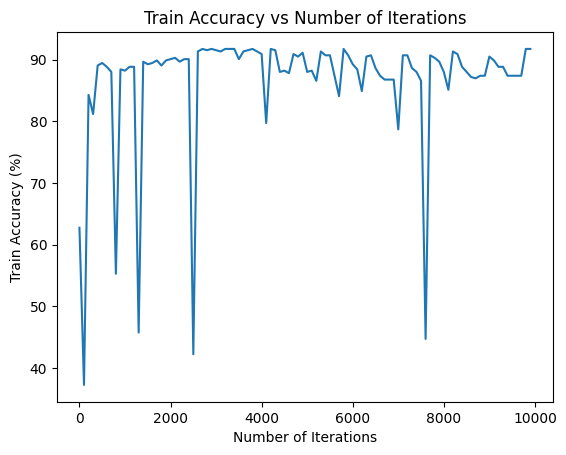

In [ ]:
plt.plot(range(0, 10000, 100), train_accuracies)
plt.xlabel("Number of Iterations")
plt.ylabel("Train Accuracy (%)")
plt.title("Train Accuracy vs Number of Iterations")
plt.show()